In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [2]:
import networkx as nx

from Classes.BiasedInfluenceGraph import *
from Classes.WordGenerator import *

## Insular function

Insular function
$ins(x) = 0$

In [3]:
def ins(G,e):
    return 0 

True


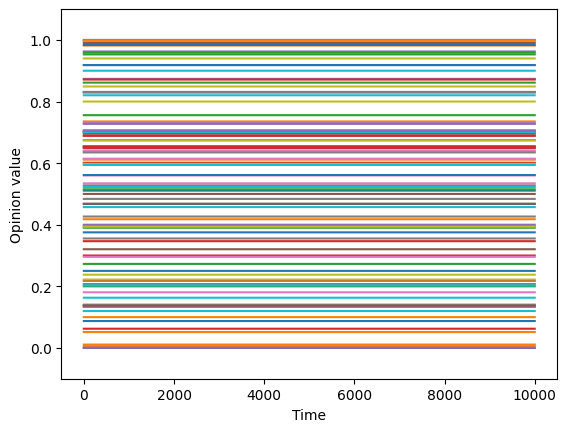

In [ ]:
# Fig 1c. Random Erdos-Renyi graph
n = 100
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=ins)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

#G.plot_opinion_evolution().savefig('../images/I_region/100_agents.png')

# Insular (stubborn) agents as agents without interaction

Insular agent can be seen as agents where their interaction with other agents doesn't exist.

$B_i + ins(B_j - B_i)I_{ij} \\$
$B_i + 0 \cdot I_{ij} \\$
$B_i$   

In [13]:
def conf(G, e):
    delta = 0.1
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x*(1 + delta - abs(x))/(1+delta)

True


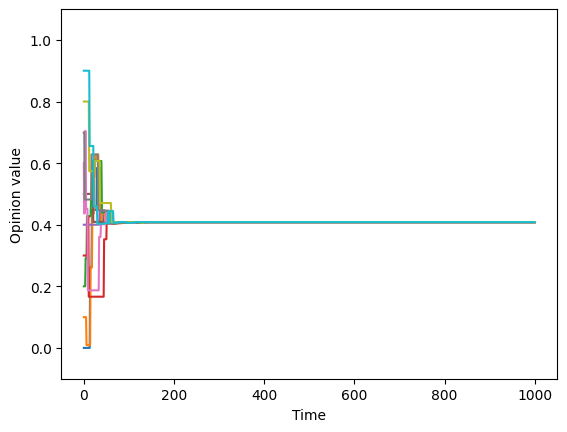

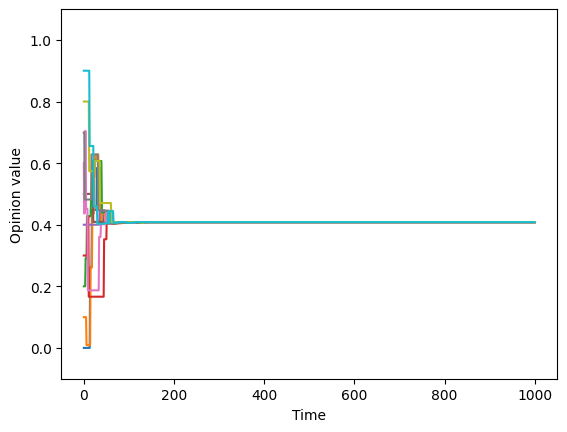

In [ ]:
# Fig 1c. Random Erdos-Renyi graph
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=conf)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

In [ ]:
def mixed_bias_fn(g, e):
    if G.has_edge(*e):
        return conf(g, e)
    else:
        return ins(g, e)

# Obtener los nodos del grafo existente G
nodos = G.nodes()

# Crear un grafo completo dirigido con los mismos nodos
G_completo = nx.complete_graph(nodos, create_using=nx.DiGraph())

# Si quieres que G_completo sea también un BiasedInfluenceGraph:
G_aux = BiasedInfluenceGraph(len(nodos), G=G_completo, ops=B0, influence_fn=lambda g, e: 1, bias_fn=mixed_bias_fn)

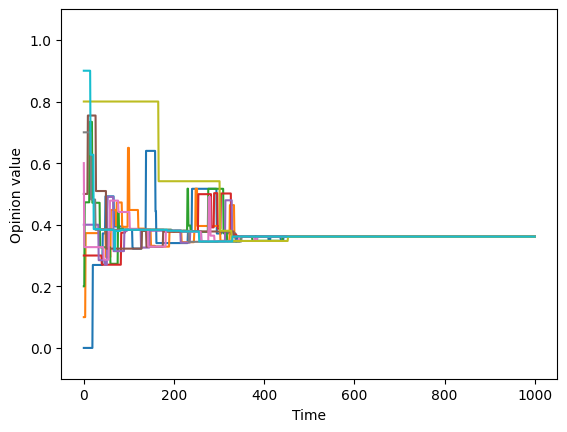

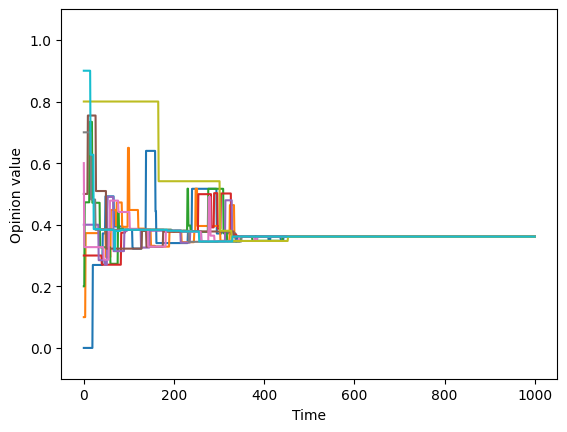

In [21]:
word_len = 100*n
w = generate_random_word(G_aux, word_len)
G_aux.execute_word(w)

G_aux.plot_opinion_evolution()